<a href="https://colab.research.google.com/github/LennartKeller/TextklassifikationsProjekt2019/blob/master/DistilBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/full_taggeddataset.csv').dropna()

In [21]:
!pip uninstall --yes tensorflow
!pip install tensorflow>=2.0.0

!pip install transformers
!pip install ktrain

Uninstalling tensorflow-2.1.0:
  Successfully uninstalled tensorflow-2.1.0


In [0]:
MODEL_NAME = 'bert-base-german-cased'

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df.genre)

In [0]:
import ktrain
from ktrain import text
transformer = text.Transformer(MODEL_NAME, maxlen=512, classes=le.classes_.tolist())

In [50]:
df_train = df[df.period == 'P1']
df_test = df[df.period != 'P1']

train_data = transformer.preprocess_train(df_train.lemmas, df_train.label)
test_data = transformer.preprocess_test(df_test.lemmas, df_test.label)

preprocessing train...
language: en


preprocessing test...
language: en


In [0]:
model = transformer.get_classifier()

In [0]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=6)

simulating training for different learning rates... this may take a few moments...
Train for 19 steps
Epoch 1/2
19/19 [==============================] - 26s 1s/step - loss: 1.9804 - accuracy: 0.2281
Epoch 2/2
14/19 [=====================>........] - ETA: 3s - loss: 12.7869 - accuracy: 0.1139

done.


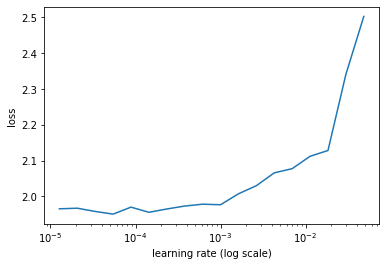

In [53]:
learner.lr_find(show_plot=True, max_epochs=2)

In [0]:
learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Train for 20 steps, validate for 142 steps
Epoch 1/10
20/20 [==============================] - 67s 3s/step - loss: 1.9269 - accuracy: 0.1391 - val_loss: 1.8808 - val_accuracy: 0.3227
Epoch 2/10
20/20 [==============================] - 52s 3s/step - loss: 1.8163 - accuracy: 0.3043 - val_loss: 1.8174 - val_accuracy: 0.4346
Epoch 3/10
20/20 [==============================] - 52s 3s/step - loss: 1.6365 - accuracy: 0.3826 - val_loss: 1.6866 - val_accuracy: 0.5112
Epoch 4/10
20/20 [==============================] - 52s 3s/step - loss: 1.3105 - accuracy: 0.6261 - val_loss: 1.5043 - val_accuracy: 0.5618
Epoch 5/10
20/20 [==============================] - 52s 3s/step - loss: 0.9308 - accuracy: 0.8261 - val_loss: 1.3186 - val_accuracy: 0.5936
Epoch 6/10
19/20 [===========================>..] - ETA: 0s - loss: 0.6993 - accuracy: 0.8509

In [0]:
learner.validate(class_names=transformer.get_classes())